In [ ]:
#access gdrive folder: 20_440Project_JS_TF_AMB must be in MyDrive
from google.colab import drive

drive.mount("/content/drive")
%cd /content/drive/My Drive/20_440Project_JS_TF_AMB

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/11ayn8NvvhQcP_j3xRQ6p0HIXj3agZbuK/20_440Project_JS_TF_AMB


# Install and load dependencies

In [ ]:
%pip install pydeseq2
%pip install scanpy
%pip install sanbomics
%pip install bioinfokit
%pip install gseapy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 359.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 9.9 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8026 sha256=85cfdd2a1efc8ca9f027e2d992297036f3bc990eb1421afc799f4fb1a5ae64ea
  Stored in directory: /root/.cache/pip/wheels/6a/aa/b9/eb5d4031476ec10802795b97ccf937b9bd998d68a9b268765a
Successfully built session-info
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.7/87.7 kB 2.4 MB/s eta 0:00:00
  Preparing metad

In [ ]:
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats
from functools import reduce
from sanbomics.plots import volcano
from bioinfokit import analys,visuz
from gseapy.plot import gseaplot

import pandas as pd
import seaborn as sns
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import sys
import gseapy as gp

# Run DESeq2

In [ ]:
merged = pd.read_csv('new_primary_TF/primary_and_goodDiffs_metadata.tsv', delimiter='\t')
merged.set_index(merged.columns[0], inplace=True)
merged.sort_index(inplace=True)

In [ ]:
merged

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,AAAS,...,ZSWIM8-AS1,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
e0,3.983400,0.722946,0.257453,73.563100,2.798250,0.032888,0.000000,0.000000,6.767160,13.914200,...,1.330300,9.511060,11.938800,14.343700,3.447220,4.062020,13.323100,19.396400,7.465260,4.124640
e1,6.664340,0.426933,0.151832,63.272900,1.993800,0.000000,0.395247,0.424968,11.937100,17.293400,...,0.891058,8.657570,12.445500,13.961800,2.244150,3.778270,9.194340,19.858100,5.005760,3.766700
e2,99.000000,123.000000,1963.000000,84977.000000,335.000000,20.000000,2.000000,2.000000,505.000000,4296.000000,...,23.000000,1431.000000,1923.000000,2875.000000,461.000000,1637.000000,3171.000000,5105.000000,3784.000000,3975.000000
e3,162.000000,60.000000,2490.000000,38794.000000,138.000000,20.000000,4.000000,1.000000,420.000000,4394.000000,...,13.000000,1210.000000,1023.000000,1024.000000,499.000000,1438.000000,3531.000000,6024.000000,3798.000000,3608.000000
e4,172.000000,76.000000,3419.000000,34128.000000,269.000000,7.000000,0.000000,1.000000,666.000000,4644.000000,...,17.000000,988.000000,1146.000000,975.000000,282.000000,1116.000000,2862.000000,4480.000000,6295.000000,4229.000000
i0,177.020808,31.450397,3.594331,131.193086,201.282543,1.797166,5.391497,0.000000,25.160318,8.985828,...,660.458346,3.594331,26.957484,19.768821,8.985828,23.363152,9.884411,7.188662,56.610715,10.782993
i1,138.247704,21.057597,10.986573,101.625796,103.456891,4.577739,1.831095,0.000000,20.142050,9.155477,...,747.086930,0.000000,18.310954,21.973145,6.408834,25.635336,13.733216,4.577739,30.213074,10.071025
i10,152.820677,24.752645,18.295433,108.696397,105.467791,0.000000,2.152404,0.000000,30.133655,7.533414,...,830.827905,2.152404,15.066827,23.676443,21.524039,21.524039,6.457212,23.676443,35.514664,13.990625
i2,232.240488,31.225612,9.758004,86.846233,183.450469,3.903201,7.806403,0.000000,15.612806,1.951601,...,707.455268,4.879002,25.370810,22.443408,19.516007,24.395009,22.443408,9.758004,43.911017,14.637006


In [ ]:
merged *= 100
merged = merged.astype(int)

In [ ]:
labels = ['Diff-CM'] * 16 + ['LV'] * 5

metadata = pd.DataFrame(zip(merged.index, labels),
                        columns = ['Sample', 'Condition'])
metadata = metadata.set_index('Sample')

In [ ]:
dds = DeseqDataSet(counts=merged,
            metadata=metadata,
            design_factors="Condition",
            ref_level = ["Condition", "LV"])

In [ ]:
dds.deseq2()

Fitting size factors...
... done in 0.04 seconds.

Fitting dispersions...
... done in 37.55 seconds.

Fitting dispersion trend curve...
... done in 0.62 seconds.

Fitting MAP dispersions...
... done in 36.86 seconds.

Fitting LFCs...
... done in 23.96 seconds.

Replacing 821 outlier genes.

Fitting dispersions...
... done in 1.86 seconds.

Fitting MAP dispersions...
... done in 1.32 seconds.

Fitting LFCs...
... done in 1.56 seconds.



In [ ]:
stat_res = DeseqStats(dds, contrast = ('Condition','LV','Diff-CM'))

stat_res.summary()
res = stat_res.results_df

Running Wald tests...
... done in 4.12 seconds.



Log2 fold change & Wald test p-value: Condition LV vs Diff-CM
              baseMean  log2FoldChange     lfcSE      stat        pvalue  \
A1BG       6473.360017       -5.477428  1.169698 -4.682770  2.830247e-06   
A1BG-AS1   1035.227209       -3.009348  0.911540 -3.301388  9.620764e-04   
A1CF        769.341202       -9.913422  1.773203 -5.590686  2.261744e-08   
A2M       26097.383588        1.711530  0.607597  2.816882  4.849234e-03   
A2M-AS1    4964.991209       -2.514362  0.982397 -2.559415  1.048484e-02   
...                ...             ...       ...       ...           ...   
ZXDB       1475.637653       -1.358864  0.440079 -3.087772  2.016630e-03   
ZXDC       2164.886927       -0.214870  0.276787 -0.776300  4.375717e-01   
ZYG11B     2967.908099        0.053419  0.515648  0.103596  9.174900e-01   
ZYX        8820.294113        1.346575  0.569702  2.363648  1.809598e-02   
ZZEF1      1845.911083        0.600711  0.321132  1.870608  6.139946e-02   

                  padj  


# Heat Map

In [ ]:
sys.setrecursionlimit(10000)  # Set a higher recursion limit (adjust the value as needed)

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


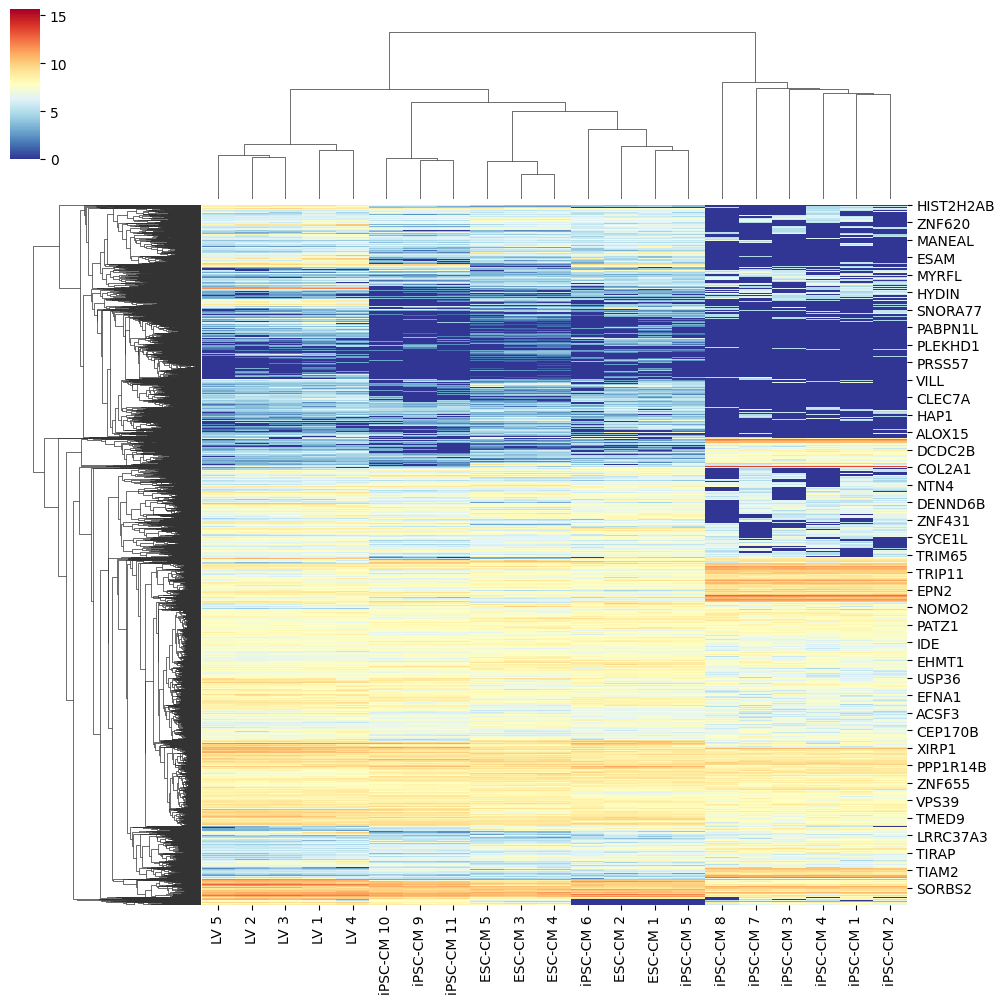

In [ ]:
dds.layers['log1p'] = np.log1p(dds.layers['normed_counts'])
dds_res = dds[:, res.index]

pattern_repetitions = {'ESC-CM': 5, 'iPSC-CM': 11, 'LV': 5}
col_labels = [f'{pattern} {i}' for pattern, repetitions in pattern_repetitions.items() for i in range(1, repetitions + 1)]

grapher_res = pd.DataFrame(dds_res.layers['log1p'].T,
                       index=dds_res.var_names, columns=col_labels)

sns.clustermap(grapher_res, cmap='RdYlBu_r',cbar_pos=(0, .85, .03, .15))

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21]),
 [Text(1, 0, 'Diff-CM 1'),
  Text(2, 0, 'Diff-CM 2'),
  Text(3, 0, 'Diff-CM 3'),
  Text(4, 0, 'Diff-CM 4'),
  Text(5, 0, 'Diff-CM 5'),
  Text(6, 0, 'Diff-CM 6'),
  Text(7, 0, 'Diff-CM 7'),
  Text(8, 0, 'Diff-CM 8'),
  Text(9, 0, 'Diff-CM 9'),
  Text(10, 0, 'Diff-CM 10'),
  Text(11, 0, 'Diff-CM 11'),
  Text(12, 0, 'Diff-CM 12'),
  Text(13, 0, 'Diff-CM 13'),
  Text(14, 0, 'Diff-CM 14'),
  Text(15, 0, 'Diff-CM 15'),
  Text(16, 0, 'Diff-CM 16'),
  Text(17, 0, 'LV 1'),
  Text(18, 0, 'LV 2'),
  Text(19, 0, 'LV 3'),
  Text(20, 0, 'LV 4'),
  Text(21, 0, 'LV 5')])

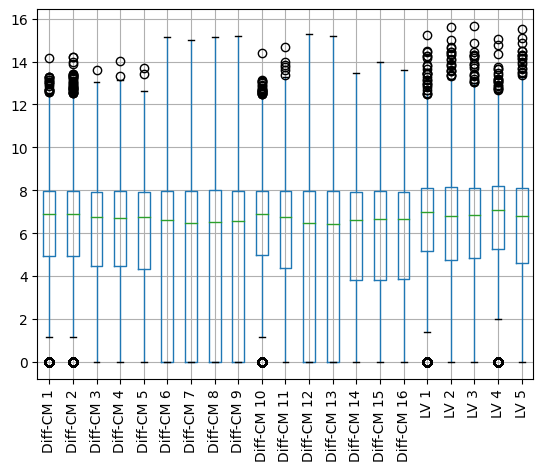

In [ ]:
grapher_res.boxplot()
plt.xticks(rotation=90)

# Heatmap of cardiac genes

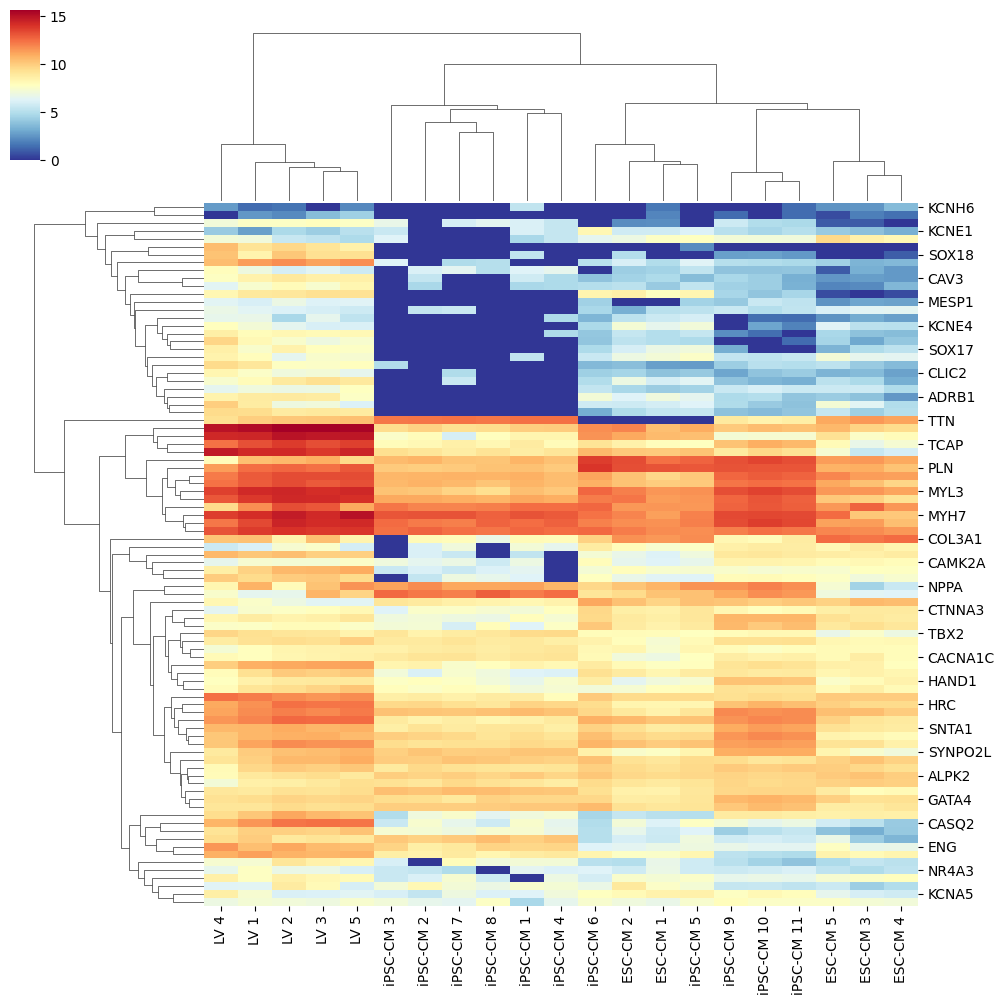

In [ ]:
cardiac_genes = pd.read_csv('dataset/cardiac_genes.csv', delimiter='\t')
common_genes = cardiac_genes['Gene'][cardiac_genes['Gene'].isin(grapher_res.index)]
subset_grapher_res = grapher_res.loc[common_genes]

sns.clustermap(subset_grapher_res, cmap='RdYlBu_r',cbar_pos=(0, .85, .03, .15))

# Differentially Expressed Genes |Log2FC| >1

In [ ]:
#Filter based on p-value
ranking = res[res['pvalue'] <= 0.05]

#Sort based on abs log2 fold change
ranking = ranking[['log2FoldChange']].dropna()
ranking['abs_l2FC'] = ranking['log2FoldChange'].abs()
ranking.sort_values(by='abs_l2FC', ascending=False, inplace=True)
ranking = ranking[ranking['abs_l2FC'] > 1]

ranking.drop(columns=['abs_l2FC'], inplace=True)


ranking

,log2FoldChange
HBA2,16.442586
SLC24A5,-16.366093
SMAD1-AS1,-15.855419
C1QA,15.570798
MIR6785,15.280714
...,...
DCAF7,-1.002550
ALDH7A1,-1.002477
CGGBP1,-1.001272
MEF2C,-1.001214


In [ ]:
pre_res = gp.prerank(rnk=ranking, # or rnk = rnk,
                     gene_sets='GO_Biological_Process_2021',
                     threads=4,
                     min_size=5,
                     max_size=1000,
                     permutation_num=1000, # reduce number to speed up testing
                     outdir=None, # don't write to disk
                     seed=6,
                     verbose=True, # see what's going on behind the scenes
                    )

out = []

for term in list(pre_res.results):
    out.append([term,
               pre_res.results[term]['fdr'],
               pre_res.results[term]['es'],
               pre_res.results[term]['nes'],
               pre_res.results[term]['gene %'],
               pre_res.results[term]['lead_genes'],])

out_df = pd.DataFrame(out, columns = ['Term','fdr', 'es', 'nes','gene %','lead_genes']).sort_values('nes').reset_index(drop = True)

out_df['abs_nes'] = abs(out_df['nes'])  # Create a new column with absolute NES values
out_df = out_df.sort_values('abs_nes', ascending=False).reset_index(drop=True)

out_df.drop('abs_nes', axis=1, inplace=True)

# Save the sorted DataFrame to a TSV file
out_df.to_csv('GSEA/allDiff_primary_new.tsv', sep='\t', index=False)

out_df

2024-04-09 15:37:22,229 [INFO] Parsing data files for GSEA.............................
2024-04-09 15:37:22,829 [INFO] Downloading and generating Enrichr library gene sets......
2024-04-09 15:37:26,632 [INFO] 2485 gene_sets have been filtered out when max_size=1000 and min_size=5
2024-04-09 15:37:26,638 [INFO] 3551 gene_sets used for further statistical testing.....
2024-04-09 15:37:26,640 [INFO] Start to run GSEA...Might take a while..................
2024-04-09 15:40:42,067 [INFO] Congratulations. GSEApy runs successfully................



,Term,fdr,es,nes,gene %,lead_genes
0,inflammatory response (GO:0006954),0.000000,0.629995,3.267630,18.88%,CCL11;FOLR2;CCL14;CCL13;HPR;CCL8;CCL18;ADORA3;...
1,cellular response to interferon-gamma (GO:0071...,0.000000,0.670484,3.188823,15.52%,HLA-DRA;CCL11;CCL14;CCL13;CCL8;CCL18;HLA-B;HLA...
2,defense response to bacterium (GO:0042742),0.000000,0.646575,2.988670,22.42%,CTSG;DEFA5;GNLY;FGR;TNFRSF14;LTF;FCER1G;ELANE;...
3,cellular response to type I interferon (GO:007...,0.000000,0.695445,2.965457,24.80%,HLA-B;XAF1;PSMB8;OASL;IFI27;HLA-E;OAS2;RSAD2;M...
4,type I interferon signaling pathway (GO:0060337),0.000000,0.695445,2.965457,24.80%,HLA-B;XAF1;PSMB8;OASL;IFI27;HLA-E;OAS2;RSAD2;M...
...,...,...,...,...,...,...
3546,negative regulation of nucleic acid-templated ...,0.999923,0.064463,0.376719,12.28%,ADIPOQ;SOX18;HEYL;TNFRSF4;CD38;CIITA;TWIST2;CB...
3547,cellular macromolecule biosynthetic process (G...,1.000000,-0.070371,-0.365398,71.58%,TICRR;BRIP1;TYMS;POLR2F;RAD9A;RMI2;CHEK1;CDK1;...
3548,negative regulation of phosphorylation (GO:004...,1.000000,-0.089711,-0.361618,91.09%,ACTN3;XDH;EPHB2;OCLN;BMP7;CDKN2A;INHBA;DNAJC10...
3549,protein complex oligomerization (GO:0051259),0.999924,-0.079514,-0.327317,33.67%,RS1;KCNC1;TMEM120B;POLQ;NLRC4;TP53BP1;KCNC3;AT...


In [ ]:
filtered_df = out_df[out_df['Term'].str.contains('heart|cardiac', case=False)]

filtered_df

,Term,fdr,es,nes,gene %,lead_genes
129,heart process (GO:0003015),0.001988,0.828339,2.167912,9.80%,RAMP3;TNNI3;MYL2;ACE;SGCD;SGCG
191,heart contraction (GO:0060047),0.010377,0.506806,2.007908,27.41%,CASQ2;TNNI3;MYL2;SCN4B;TCAP;ACE;SGCD;SGCG;MYLK...
316,cardiac muscle contraction (GO:0060048),0.037382,0.490369,1.844612,27.41%,CASQ2;TNNI3;SCN4B;TCAP;MYLK2;SCN1B;GSN;ATP1A2;...
528,membrane repolarization during cardiac muscle ...,0.108719,0.684494,1.657315,17.37%,KCND3;KCNJ8;KCNIP2;KCNJ2
552,regulation of ventricular cardiac muscle cell ...,0.122195,0.669158,1.636495,12.65%,SCN4B;CAV3;SCN1B
...,...,...,...,...,...,...
3113,cardiac atrium morphogenesis (GO:0003209),1.000000,-0.228516,-0.679681,13.99%,NOG;BMP10;TGFB2
3310,adult heart development (GO:0007512),0.989597,0.270982,0.599399,6.30%,TCAP
3330,cardiac muscle cell differentiation (GO:0055007),1.000000,-0.202585,-0.590871,37.12%,NRG1;SLC8A1;SIK1;MYOCD;CXADR;BMP2
3375,positive regulation of cardiac epithelial to m...,0.992132,0.237030,0.569387,18.23%,TGFBR2;ENG


# Compiling DE genes

In [ ]:
DE = res[['Gene', 'log2FoldChange', 'pvalue']].copy()
DE['-log10FDR'] = -np.log10(DE['pvalue'])
DE['product'] = DE['-log10FDR'] * DE['log2FoldChange']
DE.sort_values(by='product', key=lambda x: abs(x), ascending=False, inplace=True)

#Filter based on p-value and log2FC
DE = DE[DE['pvalue'] <= 0.05]
DE = DE[abs(DE['log2FoldChange']) >= 1]

DE.drop(columns=['pvalue'], inplace=True)
DE = DE.reset_index(drop=True)

DE.to_csv('dataset/DE_dataframes/DE_allDiff_primary_new.tsv', sep='\t', index=False)